<h1>Python Project for Data Science</h1>
<h2>By Daniel Karrasch, 7/23/2024</h2>

<h2>Analyzing Historical Stock/Revenue Data and Building a Dashboard</h2>

!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install pandas==1.3.3
!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4
!pip install plotly==5.3.1

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib_inline
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

<h3>Question 1</h3>
<h5>Use yfinance to extract stock data for Tesla.  Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function..</h5>

In [2]:
tesla = yf.Ticker("TSLA")

In [3]:
tesla_data = tesla.history(period="max")

In [4]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h3>Question 2</h3>
<h5>Display the last five rows of the tesla_revenue dataframe using the tail function.</h5>

In [38]:
url = "https://stockanalysis.com/stocks/tsla/revenue/"
data  = requests.get(url).text

In [39]:
soup = BeautifulSoup(data, 'html.parser')

In [40]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [41]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text    
    if revenue[-1] == 'M':
        revenue = float(revenue[:-1])
        revenue = revenue/1000
    elif revenue[-1] == 'K':
        revenue = float(revenue[:-1])
        revenue = revenue/1000000
    else:
        revenue = float(revenue[:-1])
    # Finally we append the data of each row to the table
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)    

In [42]:
tesla_revenue.tail()

,Date,Revenue
12,"Dec 31, 2011",0.204240
13,"Dec 31, 2010",0.116740
14,"Dec 31, 2009",0.111940
15,"Dec 31, 2008",0.014740
16,"Dec 31, 2007",0.000073


<h3>Question 3</h3>
<h5>Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. </h5>

In [10]:
gamestop = yf.Ticker("GME")

In [11]:
gamestop_data = gamestop.history(period="max")

In [12]:
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


<h3>Question 4</h3>
<h5>Display the last five rows of the gme_revenue dataframe using the tail function.</h5>

In [47]:
url = "https://stockanalysis.com/stocks/gme/revenue/"
data  = requests.get(url).text

In [48]:
soup = BeautifulSoup(data, 'html.parser')

In [49]:
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [50]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text    
    if revenue[-1] == 'M':
        revenue = float(revenue[:-1])
        revenue = revenue/1000
    elif revenue[-1] == 'K':
        revenue = float(revenue[:-1])
        revenue = revenue/1000000
    else:
        revenue = float(revenue[:-1])
    #print(revenue)
    # Finally we append the data of each row to the table
    gamestop_revenue = pd.concat([gamestop_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True) 

In [51]:
gamestop_revenue.tail()

,Date,Revenue
20,"Jan 31, 2004",1.58000
21,"Feb 1, 2003",1.35000
22,"Feb 2, 2002",1.12000
23,"Feb 3, 2001",0.75670
24,"Jan 30, 1999",0.46517


<h3>Question 5</h3>
<h5>Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.</h5>

In [52]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Stock Price", "Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date), y=stock_data.Close.astype("float"), name="Stock Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Billions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

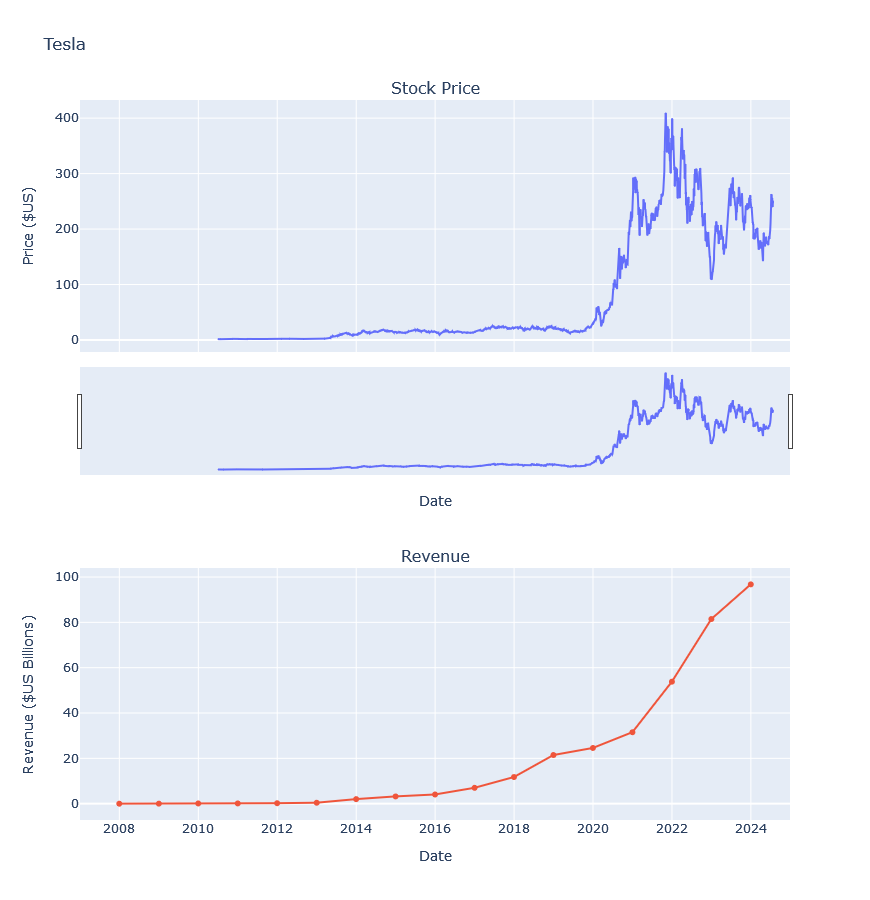

In [45]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

<h3>Question 6</h3>
<h5>Use the make_graph function to graph the Gamestop Stock Data, also provide a title for the graph.</h5>

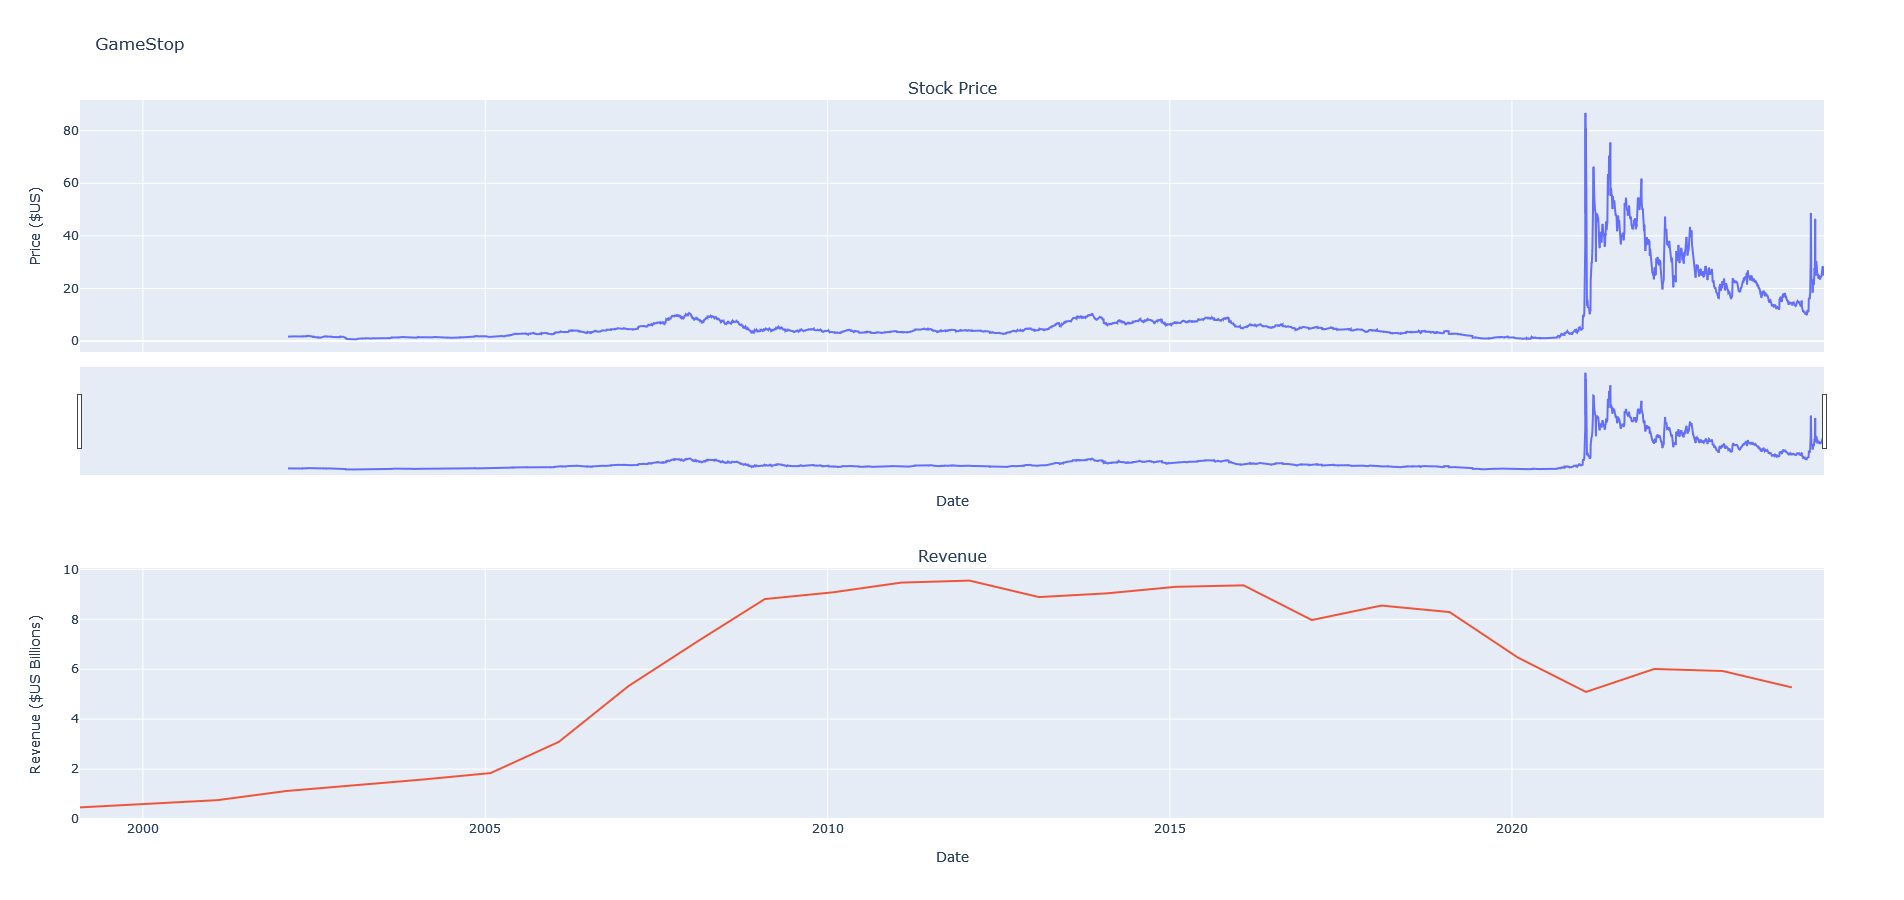

In [53]:
make_graph(gamestop_data, gamestop_revenue, 'GameStop')